In [58]:
import sys
sys.path.append("../")
import numpy as np
from athena_read import athdf
import matplotlib.pyplot as plt
import Constants 
c=Constants.Constants()

%matplotlib inline
base_dir = '../../../data/TDSC/M20_B0.1_R2_D0.02_PR/'

Constants defined...


In [2]:
import matplotlib as mpl

mpl.rcParams.update({
    "axes.labelsize": 10,
    "font.size": 10,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "mathtext.default": "regular",
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
    "axes.unicode_minus": True,
    
    # Log scale specific additions
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,
    "xtick.minor.width": 0.8,
    "ytick.minor.width": 0.8,
    "xtick.minor.top": True,
    "xtick.minor.bottom": True,
    "ytick.minor.left": True,
    "ytick.minor.right": True,
})

In [59]:
myfile=base_dir + "COLL.out1."+"00050"+".athdf"
d = athdf(myfile)
X,Y = np.meshgrid(d['x1f'], d['x2f'], indexing='ij')

Text(0, 0.5, 'y')

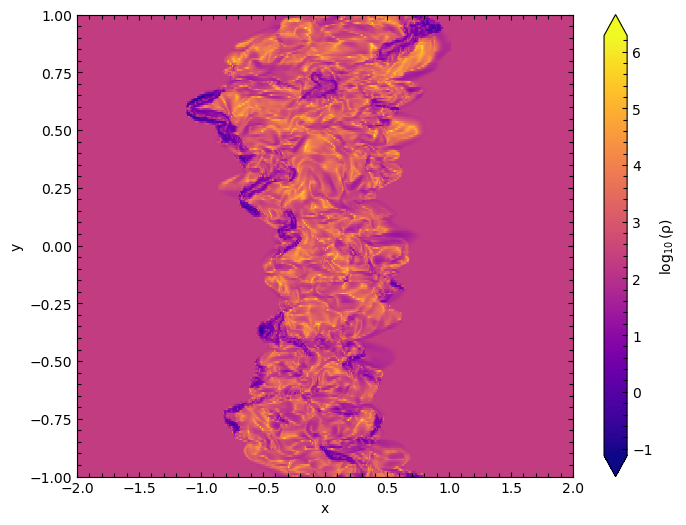

In [72]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
contour = ax.pcolormesh(X, Y, (np.log10(2*d['rho']/(d['Bcc1']**2+d['Bcc2']**2+d['Bcc3']**2))[32,:,:]).T,cmap='plasma',shading='auto')
cb1=plt.colorbar(contour,extend='both',label=r'$\log_{10}\left( \rho \right)$ ')
ax.set_xlabel("x")
ax.set_ylabel("y")

Text(0, 0.5, 'y')

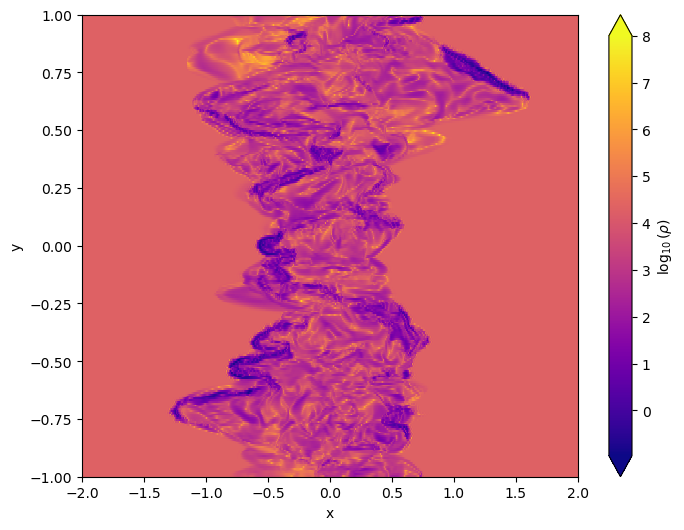

In [6]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
contour = ax.pcolormesh(X, Y, (np.log10(2*d['rho']/(d['Bcc1']**2+d['Bcc2']**2+d['Bcc3']**2))[32,:,:]).T,cmap='plasma',shading='auto')
cb1=plt.colorbar(contour,extend='both',label=r'$\log_{10}\left( \rho \right)$ ')
ax.set_xlabel("x")
ax.set_ylabel("y")

Text(0, 0.5, 'y')

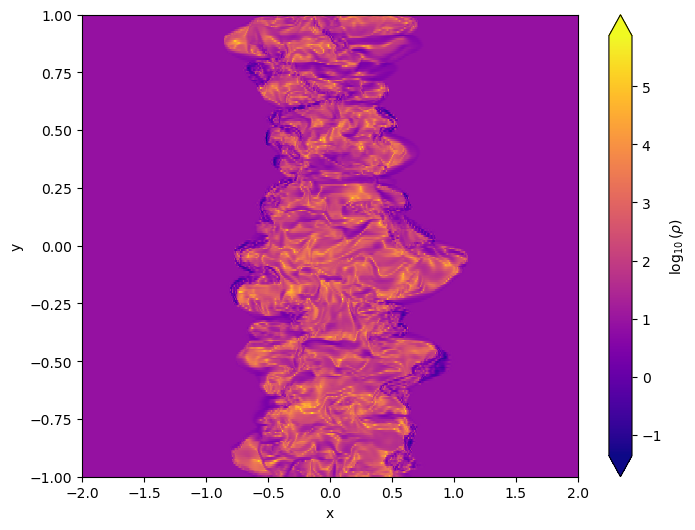

In [9]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
contour = ax.pcolormesh(X, Y, (np.log10(2*d['rho']/(d['Bcc1']**2+d['Bcc2']**2+d['Bcc3']**2))[32,:,:]).T,cmap='plasma',shading='auto')
cb1=plt.colorbar(contour,extend='both',label=r'$\log_{10}\left( \rho \right)$ ')
ax.set_xlabel("x")
ax.set_ylabel("y")

Text(0, 0.5, 'y')

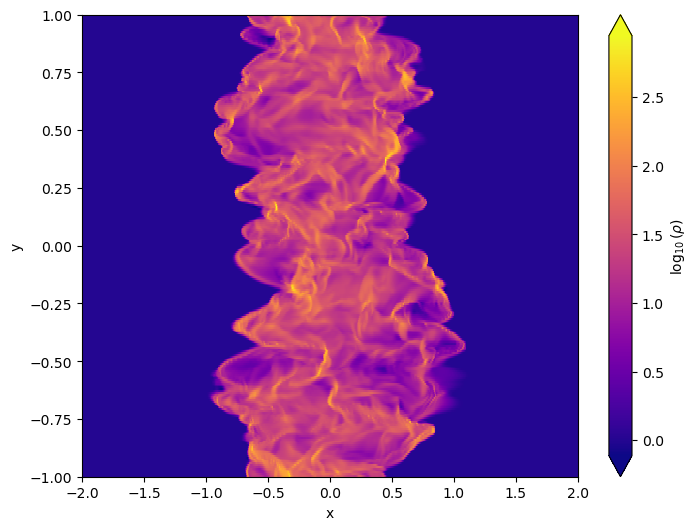

In [8]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
contour = ax.pcolormesh(X, Y, (np.log10(d['rho'])[100,:,:]).T,cmap='plasma',shading='auto')
cb1=plt.colorbar(contour,extend='both',label=r'$\log_{10}\left( \rho \right)$ ')
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_xlim(-1,1)
# ax.set_ylim(-2,2)

In [4]:
dx=2/np.shape(d['rho'])[2]
dy=dx; dz=dx

def grad(f, dx, axis):
    return (np.roll(f, -1, axis=axis) - np.roll(f, 1, axis=axis)) / (2 * dx)

# velocity divergence
divv = grad(d['vel1'], dx, 0) + grad(d['vel2'], dy, 1) + grad(d['vel3'], dz, 2)

# compute stretching term numerator
stretch_num = (d['Bcc1'] * grad(d['vel1'], dx, 0) +
               d['Bcc2'] * grad(d['vel2'], dy, 1) +
               d['Bcc3'] * grad(d['vel3'], dz, 2))

Bmag = np.sqrt(d['Bcc1']**2 + d['Bcc2']**2 + d['Bcc3']**2) + 1e-20
gamma_dyn  = stretch_num / Bmag
gamma_comp = -divv

/tmp/ipykernel_280375/1593092901.py:18: RuntimeWarning: divide by zero encountered in log10
  Z = (np.log10(np.abs(gamma_dyn)/(np.abs(gamma_comp)+10e-20))[32,:,:]).T


Text(0, 0.5, 'y')

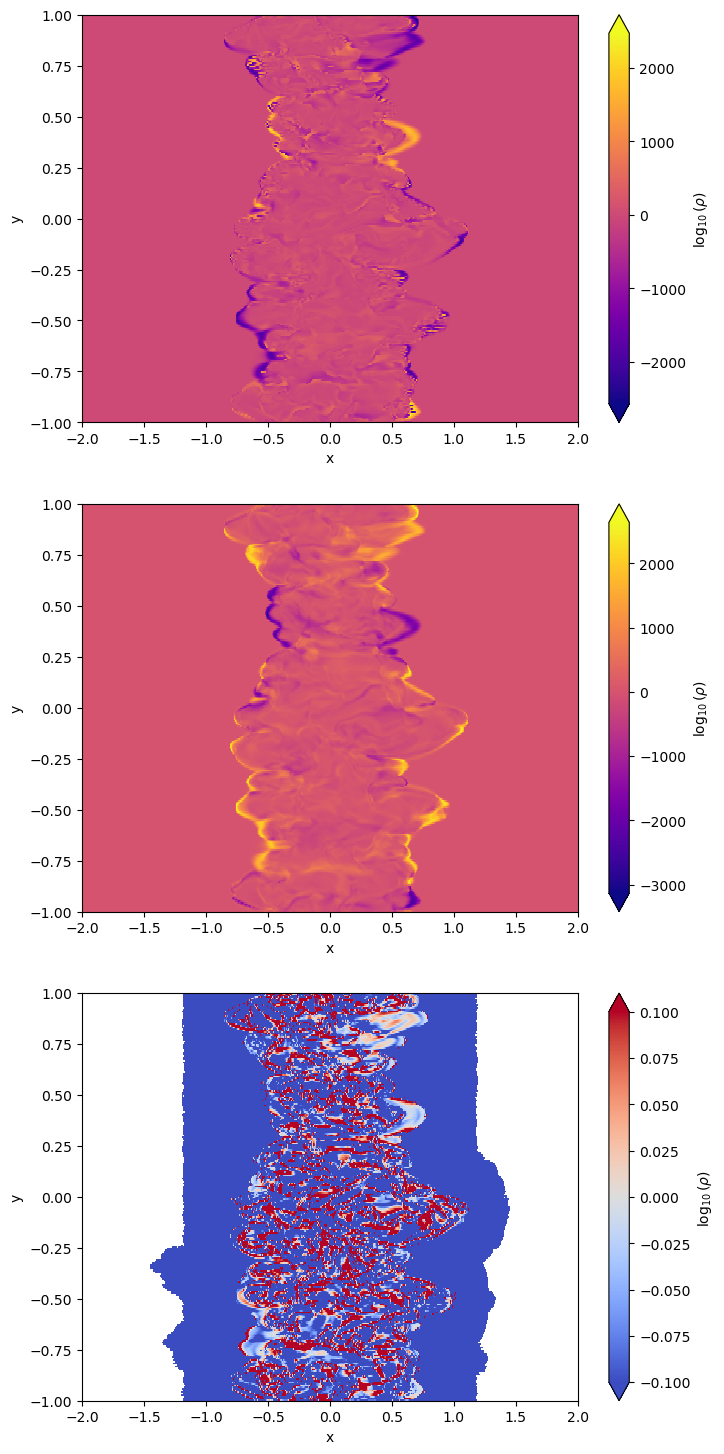

In [31]:
fig = plt.figure(figsize=(8,18))
# First subplot: 2 rows, 1 column, position 1
ax1 = fig.add_subplot(3, 1, 1)

# Second subplot: 2 rows, 1 column, position 2
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
contour1 = ax1.pcolormesh(X, Y, ((gamma_dyn)[32,:,:]).T,cmap='plasma',shading='auto')
cb1=plt.colorbar(contour1,extend='both',label=r'$\log_{10}\left( \rho \right)$ ')
ax1.set_xlabel("x")
ax1.set_ylabel("y")
contour2 = ax2.pcolormesh(X, Y, (((gamma_comp))[32,:,:]).T,cmap='plasma',shading='auto')
cb2=plt.colorbar(contour2,extend='both',label=r'$\log_{10}\left( \rho \right)$ ')
ax2.set_xlabel("x")
ax2.set_ylabel("y")

from matplotlib.colors import TwoSlopeNorm
Z = (np.log10(np.abs(gamma_dyn)/(np.abs(gamma_comp)+10e-20))[32,:,:]).T

# 2. Define the Pivot Value (the dividing line)
pivot_value = 0

# 3. Define Min/Max for the full color range
z_min = np.min(Z)
z_max = np.max(Z)

# 4. Create the Normalization Object
# The 'center' is set to the pivot_value
norm = TwoSlopeNorm(
    vmin=z_min, 
    vcenter=pivot_value, 
    vmax=z_max
)
contour3 = ax3.pcolormesh(X, Y, Z, cmap='coolwarm', norm=norm,shading='auto')
cb2=plt.colorbar(contour3,extend='both',label=r'$\log_{10}\left( \rho \right)$ ')
ax3.set_xlabel("x")
ax3.set_ylabel("y")

In [6]:
np.mean((np.abs(gamma_dyn)/(np.abs(gamma_comp)+10e-20))[200:312,:,:])

np.float32(1.3748016)

In [11]:
# Perform FFT on the 3D array
shape = np.array(np.shape((d['rho'])))
shape_x = shape[2]
shape_x = 60

# Generate wavevector coordinates ranging from -k to k
kz = np.fft.fftfreq(shape[0])
ky = np.fft.fftfreq(shape[1])
kx = np.fft.fftfreq(shape_x)

# Shift zero frequency component to the center
kz = np.fft.fftshift(kz)*(shape[0]/1)
ky = np.fft.fftshift(ky)*(shape[1]/1)
kx = np.fft.fftshift(kx)*(shape[2]/2)

# Create meshgrida for the wavevectors
Kz_3d, Ky_3d, Kx_3d = np.meshgrid(kz, ky, kx, indexing='ij')
Kz_2d, Ky_2d = np.meshgrid(kz, ky, indexing='ij')

In [7]:
k2_3d = (Kx**2 + Ky**2 + Kz**2)
k2_2d = Kx**2 + Ky**2

fft_vx_c = (Kx_3d*fft_vx+Ky_3d*fft_vy+Kz_3d*fft_vz)*Kx/(k2_3d+1e-20)
fft_vy_c = (Kx_3d*fft_vx+Ky_3d*fft_vy+Kz_3d*fft_vz)*Ky/(k2_3d+1e-20)
fft_vz_c = (Kx_3d*fft_vx+Ky_3d*fft_vy+Kz_3d*fft_vz)*Kz/(k2_3d+1e-20)

fft_vx_s = fft_vx-fft_vx_c
fft_vy_s = fft_vy-fft_vy_c
fft_vz_s = fft_vz-fft_vz_c

vx_s = np.fft.ifftn(np.fft.ifftshift(fft_vx_s))
vy_s = np.fft.ifftn(np.fft.ifftshift(fft_vy_s))
vz_s = np.fft.ifftn(np.fft.ifftshift(fft_vz_s))

vx_c = np.fft.ifftn(np.fft.ifftshift(fft_vx_c))
vy_c = np.fft.ifftn(np.fft.ifftshift(fft_vy_c))
vz_c = np.fft.ifftn(np.fft.ifftshift(fft_vz_c))

ValueError: operands could not be broadcast together with shapes (256,256,60) (256,256,512) 

In [60]:
wx = 0.5 * (1 - np.cos(2 * np.pi * np.arange(shape_x) / (shape_x - 1)))
W  = wx[None, None, :]

# id_xl=0
# id_xr=-1
id_xl=226
id_xr=286

fft_vx = np.fft.fftshift(np.fft.fftn(d['vel1'][:,:,id_xl:id_xr]*W)) #, axes=(0, 1)
fft_vy = np.fft.fftshift(np.fft.fftn(d['vel2'][:,:,id_xl:id_xr]*W))
fft_vz = np.fft.fftshift(np.fft.fftn(d['vel3'][:,:,id_xl:id_xr]*W))

fft_Bx = np.fft.fftshift(np.fft.fftn((d['Bcc1'][:,:,id_xl:id_xr])*W))
fft_By = np.fft.fftshift(np.fft.fftn(d['Bcc2'][:,:,id_xl:id_xr]*W))
fft_Bz = np.fft.fftshift(np.fft.fftn(d['Bcc3'][:,:,id_xl:id_xr]*W))

fft_vax = np.fft.fftshift(np.fft.fftn((d['Bcc1'][:,:,id_xl:id_xr])/d['rho'][:,:,id_xl:id_xr]))
fft_vay = np.fft.fftshift(np.fft.fftn(d['Bcc2'][:,:,id_xl:id_xr]/d['rho'][:,:,id_xl:id_xr]))
fft_vaz = np.fft.fftshift(np.fft.fftn(d['Bcc3'][:,:,id_xl:id_xr]/d['rho'][:,:,id_xl:id_xr]))

In [61]:
k = np.sqrt(Kx_3d**2 + Ky_3d**2 + Kz_3d**2)
power_spectrum = np.abs(fft_vx)**2+np.abs(fft_vy)**2+np.abs(fft_vz)**2
power_spectrum_vpa = np.abs(fft_vax)**2
power_spectrum_vpe = np.abs(fft_vay)**2+np.abs(fft_vaz)**2

# Bin the k-values to compute the spectrum
k_bins = np.linspace(np.min(k), (np.max(k)), num=500)  # Adjust bin size as needed
energy_spectrum = np.zeros(len(k_bins) - 1)
energy_spectrum_vpa = np.zeros(len(k_bins) - 1)
energy_spectrum_vpe = np.zeros(len(k_bins) - 1)

# Compute the energy in each bin
for i in range(len(k_bins) - 1):
    bin_mask = (k >= k_bins[i]) & (k < k_bins[i + 1])
    energy_spectrum[i] = np.sum(power_spectrum[bin_mask])
    energy_spectrum_vpa[i] = np.sum(power_spectrum_vpa[bin_mask])
    energy_spectrum_vpe[i] = np.sum(power_spectrum_vpe[bin_mask])

# Compute the center of each bin for plotting
bin_centers = 0.5 * (k_bins[:-1] + k_bins[1:])

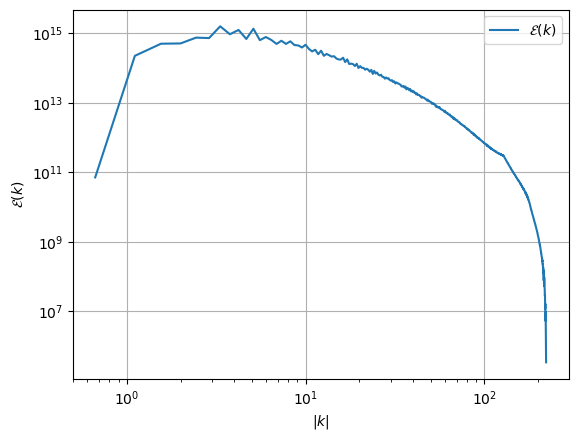

In [16]:
# Plot the distribution
plt.plot(bin_centers[1:], energy_spectrum[1:], label=r'$\mathcal{E}(k)$')
# plt.plot(bin_centers[1:],bin_centers[1:]**(-2)*10**10.2)
# plt.plot(bin_centers[1:],bin_centers[1:]**(-5/3)*10**9.0)
plt.xlabel(r'$|k|$')
plt.ylabel(r'$\mathcal{E}(k)$')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

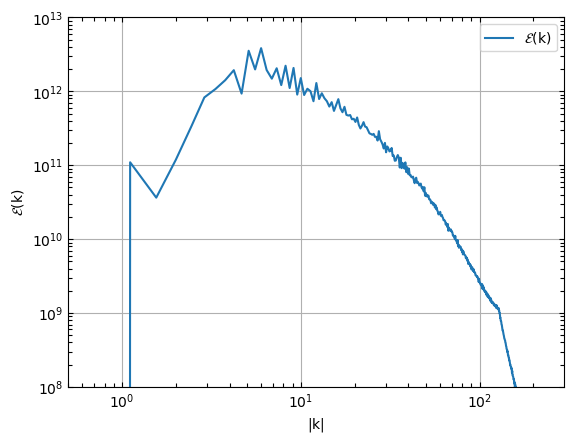

In [22]:
# Plot the distribution
plt.plot(bin_centers[1:], energy_spectrum[1:], label=r'$\mathcal{E}(k)$')
# plt.plot(bin_centers[1:],bin_centers[1:]**(-2)*10**10.2)
# plt.plot(bin_centers[1:],bin_centers[1:]**(-5/3)*10**9.0)
plt.xlabel(r'$|k|$')
plt.ylabel(r'$\mathcal{E}(k)$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**8,10**13)
plt.grid(True)
plt.legend()
plt.show()

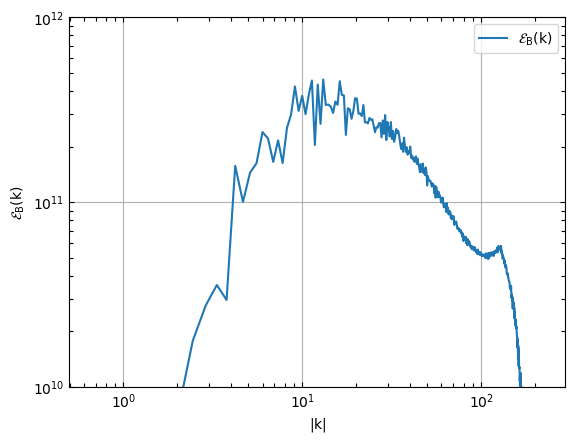

In [21]:
# Plot the distribution
plt.plot(bin_centers[1:], energy_spectrum[1:], label=r'$\mathcal{E}_B(k)$')
# plt.plot(bin_centers[1:],bin_centers[1:]**(-2)*10**10.2)
# plt.plot(bin_centers[1:],bin_centers[1:]**(-5/3)*10**9.0)
plt.xlabel(r'$|k|$')
plt.ylabel(r'$\mathcal{E}_B(k)$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**10,10**12)
plt.grid(True)
plt.legend()
plt.show()

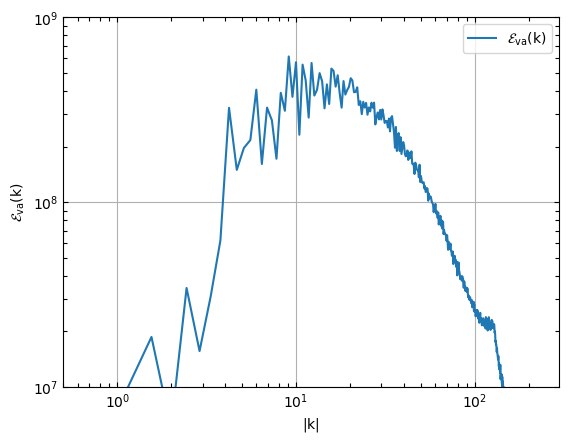

In [30]:
# Plot the distribution
plt.plot(bin_centers[1:], energy_spectrum[1:], label=r'$\mathcal{E}_{va}(k)$')
# plt.plot(bin_centers[1:],bin_centers[1:]**(-2)*10**10.2)
# plt.plot(bin_centers[1:],bin_centers[1:]**(-5/3)*10**9.0)
plt.xlabel(r'$|k|$')
plt.ylabel(r'$\mathcal{E}_{va}(k)$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**7,10**9)
plt.grid(True)
plt.legend()
plt.show()

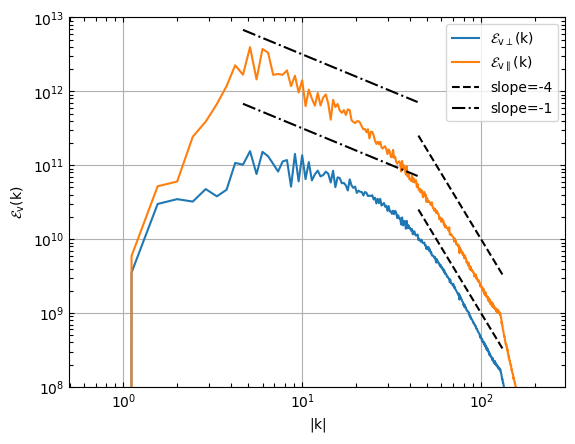

In [47]:
#M20_B0.1_R2_D0.02_PR
# Plot the distribution
plt.plot(bin_centers[1:], energy_spectrum_vpe[1:], label=r'$\mathcal{E}_{v\perp}(k)$')
plt.plot(bin_centers[1:], energy_spectrum_vpa[1:], label=r'$\mathcal{E}_{v\parallel}(k)$')
plt.plot(bin_centers[100:300],bin_centers[100:300]**(-12/3)*10**17,'k--',label='slope=-4')
plt.plot(bin_centers[10:100],bin_centers[10:100]**(-1)*10**12.5,'k-.',label='slope=-1')
plt.plot(bin_centers[100:300],bin_centers[100:300]**(-12/3)*10**18,'k--')
plt.plot(bin_centers[10:100],bin_centers[10:100]**(-1)*10**13.5,'k-.')
plt.xlabel(r'$|k|$')
plt.ylabel(r'$\mathcal{E}_{v}(k)$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**8,10**13)
plt.grid(True)
plt.legend()
plt.show()

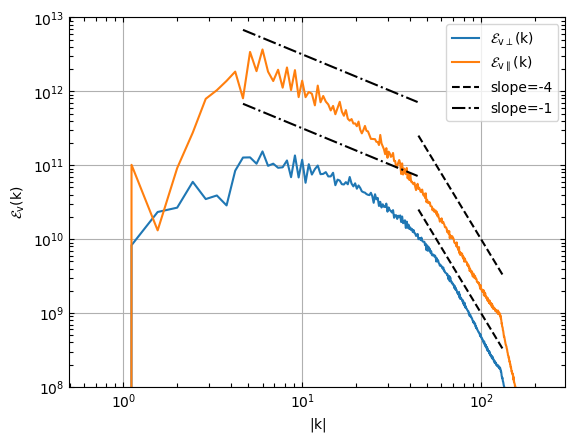

In [27]:
#M20_B0.1_R2_D0.001_PR
# Plot the distribution
plt.plot(bin_centers[1:], energy_spectrum_vpe[1:], label=r'$\mathcal{E}_{v\perp}(k)$')
plt.plot(bin_centers[1:], energy_spectrum_vpa[1:], label=r'$\mathcal{E}_{v\parallel}(k)$')
plt.plot(bin_centers[100:300],bin_centers[100:300]**(-12/3)*10**17,'k--',label='slope=-4')
plt.plot(bin_centers[10:100],bin_centers[10:100]**(-1)*10**12.5,'k-.',label='slope=-1')
plt.plot(bin_centers[100:300],bin_centers[100:300]**(-12/3)*10**18,'k--')
plt.plot(bin_centers[10:100],bin_centers[10:100]**(-1)*10**13.5,'k-.')
plt.xlabel(r'$|k|$')
plt.ylabel(r'$\mathcal{E}_{v}(k)$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**8,10**13)
plt.grid(True)
plt.legend()
plt.show()

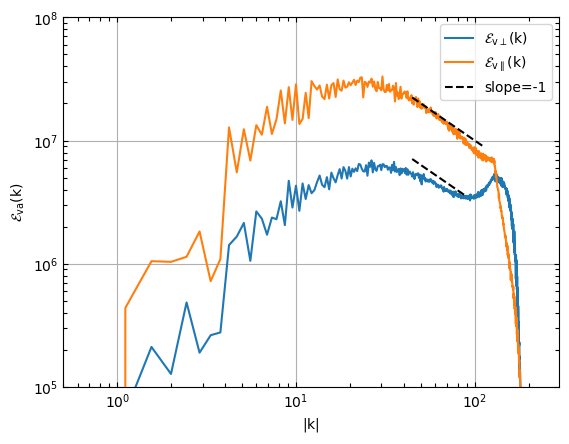

In [71]:
#M20_B0.1_R2_D0.02_PR
# Plot the distribution
plt.plot(bin_centers[1:], energy_spectrum_vpe[1:], label=r'$\mathcal{E}_{v\perp}(k)$')
plt.plot(bin_centers[1:], energy_spectrum_vpa[1:], label=r'$\mathcal{E}_{v\parallel}(k)$')
plt.plot(bin_centers[100:250],bin_centers[100:250]**(-1)*10**9,'k--',label='slope=-1')
plt.plot(bin_centers[100:200],bin_centers[100:200]**(-1)*10**8.5,'k--')
plt.xlabel(r'$|k|$')
plt.ylabel(r'$\mathcal{E}_{va}(k)$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**5,10**8)
plt.grid(True)
plt.legend()
plt.show()


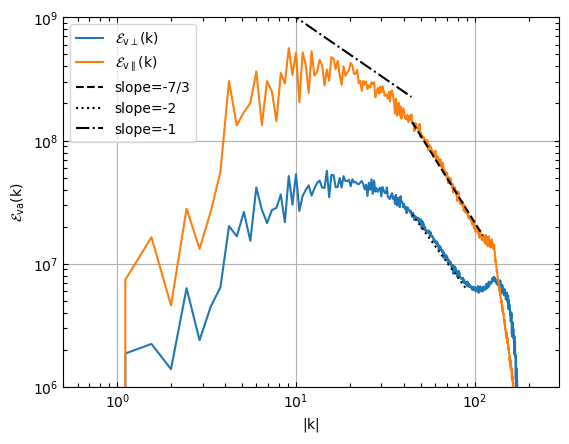

In [57]:
#M20_B0.5_R2_D0.02_PR
# Plot the distribution
plt.plot(bin_centers[1:], energy_spectrum_vpe[1:], label=r'$\mathcal{E}_{v\perp}(k)$')
plt.plot(bin_centers[1:], energy_spectrum_vpa[1:], label=r'$\mathcal{E}_{v\parallel}(k)$')
plt.plot(bin_centers[100:250],bin_centers[100:250]**(-7/3)*10**12,'k--',label='slope=-7/3')
plt.plot(bin_centers[100:200],bin_centers[100:200]**(-6/3)*10**10.7,'k:',label='slope=-2')
plt.plot(bin_centers[10:100],bin_centers[10:100]**(-1)*10**10,'k-.',label='slope=-1')
plt.xlabel(r'$|k|$')
plt.ylabel(r'$\mathcal{E}_{va}(k)$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**6,10**9)
plt.grid(True)
plt.legend()
plt.show()

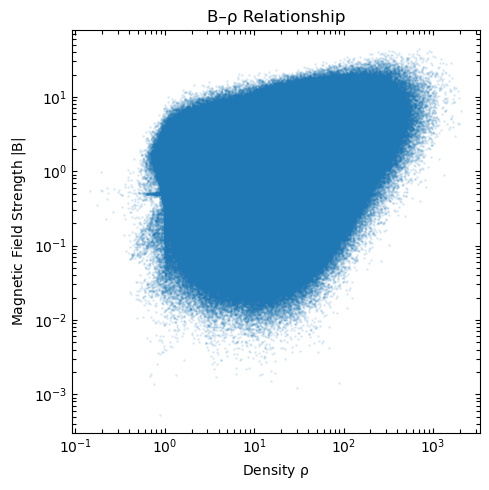

In [35]:
# Flatten both arrays
rvals = d['rho'].ravel()
Bvals = np.sqrt(d['Bcc1']**2+d['Bcc2']**2+d['Bcc3']**2).ravel()

# ----------------------------------------------------------
# Plot B–ρ scaling (log-log scatter)
# ----------------------------------------------------------
plt.figure(figsize=(5,5))
plt.scatter(rvals, Bvals, s=1, alpha=0.1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"Density $\rho$")
plt.ylabel(r"Magnetic Field Strength $|B|$")
plt.title("B–ρ Relationship")
plt.tight_layout()
plt.show()

In [36]:
# Fit log-log slope
mask = (rvals > 0) & (Bvals > 0)
coeffs = np.polyfit(np.log10(rvals[mask]), np.log10(Bvals[mask]), 1)
slope = coeffs[0]
print("Estimated B–ρ scaling exponent k ≈", slope)

Estimated B–ρ scaling exponent k ≈ 0.16979576995165502


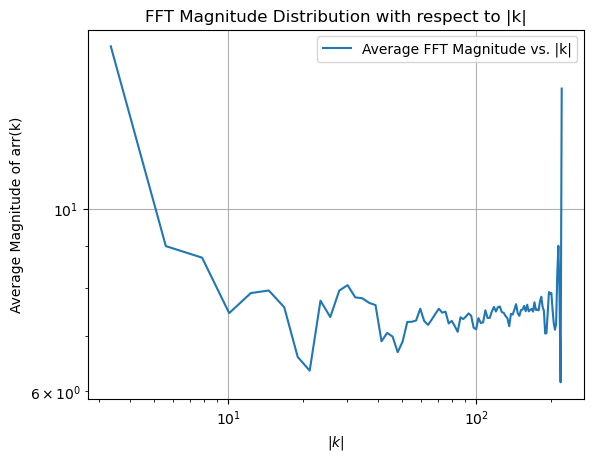

In [17]:
# Plot the distribution
plt.plot(bin_centers[1:], energy_spectrum[1:], label='Average FFT Magnitude vs. |k|')
# plt.plot(bin_centers[1:],bin_centers[1:]**(-2)*10**10.2)
# plt.plot(bin_centers[1:],bin_centers[1:]**(-5/3)*10**9.0)
plt.xlabel(r'$|k|$')
plt.ylabel('Average Magnitude of arr(k)')
plt.title('FFT Magnitude Distribution with respect to |k|')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

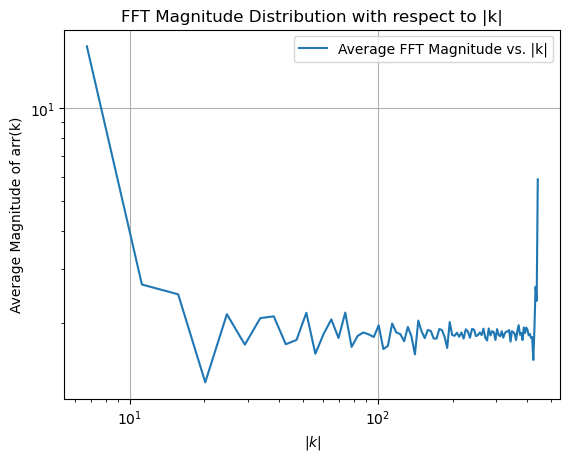

In [30]:
# Plot the distribution
plt.plot(bin_centers[1:], energy_spectrum[1:], label='Average FFT Magnitude vs. |k|')
# plt.plot(bin_centers[1:],bin_centers[1:]**(-2)*10**10.2)
# plt.plot(bin_centers[1:],bin_centers[1:]**(-5/3)*10**9.0)
plt.xlabel(r'$|k|$')
plt.ylabel('Average Magnitude of arr(k)')
plt.title('FFT Magnitude Distribution with respect to |k|')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

In [3]:
cdl_1 = np.loadtxt('dat/M20_B0.1_R2_D0.02_PR.dat')
cdl_01 = np.loadtxt('dat/M20_B0.01_R2_D0.02_PR.dat')
cdl_001 = np.loadtxt('dat/M20_B0.001_R2_D0.02_PR.dat')
cdl_5 = np.loadtxt('dat/M20_B0.5_R2_D0.02_PR.dat')

Text(0, 0.5, '$B_{cdl}$')

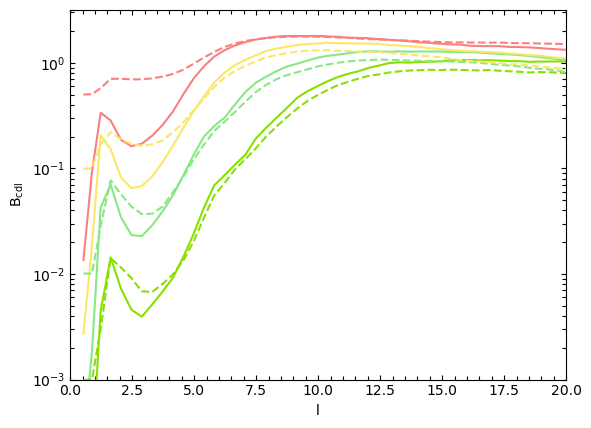

In [7]:
plt.plot(cdl_01[:,1],cdl_001[:,6],'#87e000')
plt.plot(cdl_01[:,1],cdl_01[:,6],'#87e885')
plt.plot(cdl_1[:,1],cdl_1[:,6],'#fae768')
plt.plot(cdl_5[:,1],cdl_5[:,6],'#fa8080')
plt.plot(cdl_01[:,1],cdl_001[:,7],linestyle='--', color='#87e000')
plt.plot(cdl_01[:,1],cdl_01[:,7],linestyle='--', color='#87e885')
plt.plot(cdl_1[:,1],cdl_1[:,7],linestyle='--', color='#fae768')
plt.plot(cdl_5[:,1],cdl_5[:,7],linestyle='--', color='#fa8080')
plt.ylim(10**-3,10**0.5)
plt.axvline(x=-1)
plt.xlim(0,20)
plt.yscale('log')
plt.xlabel('l')
plt.ylabel(r'$B_{cdl}$')


In [8]:
cdl_001[-1,7]/cdl_001[-1,6]

np.float64(0.7799145804081156)

In [9]:
cdl_01[-1,7]/cdl_01[-1,6]

np.float64(0.775989440486609)

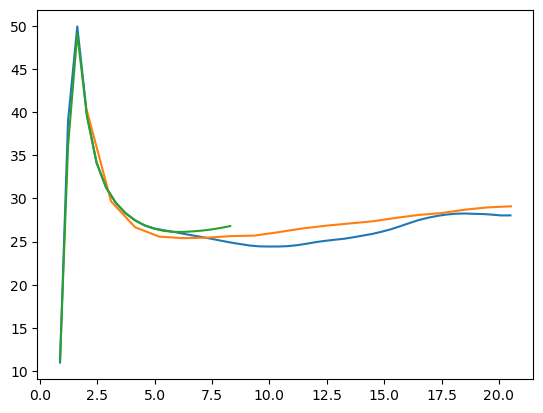

In [9]:
plt.plot(cdl_01[1:,1],cdl_01[1:,0])
plt.plot(cdl_1[1:,1],cdl_1[1:,0])
plt.plot(cdl_5[1:,1],cdl_5[1:,0])